In [1]:
import sys

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

from evaluation.deviations_evalaution_metrics import load_results, DeviationEvaluation

In [2]:
# Load deviation prediction results:
path_pred_deviations = "../2_conformance_prediction/results/BPIC20/deviation_predictions.pkl"

# Evaluation deviation labels

In [3]:
deviation_results_evaluation = load_results(path=path_pred_deviations)
eval = DeviationEvaluation(deviation_results=deviation_results_evaluation)

In [4]:
# Only evaluate labels that are in the target set!
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_dev()
print("Precision macro dev: ", precision_macro)
print("Precision macro dev per label: ", precision_per_label)
print("Recall macro dev: ", recall_macro)
print("Recall macro dev per label: ", recall_per_label)

Precision macro dev:  0.08148904212852151
Precision macro dev per label:  {('>>', 'Declaration APPROVED by ADMINISTRATION'): 0.2901439645625692, ('>>', 'Declaration REJECTED by ADMINISTRATION'): 0.5, ('>>', 'Declaration REJECTED by EMPLOYEE'): 0.0, ('>>', 'Request Payment'): 0.0006313131313131314, ('Declaration APPROVED by PRE_APPROVER', '>>'): 0.06035578144853875, ('Declaration FINAL_APPROVED by SUPERVISOR', '>>'): 0.0, ('Declaration REJECTED by EMPLOYEE', '>>'): 0.11439114391143912, ('Declaration REJECTED by MISSING', '>>'): 0.009151414309484194, ('Declaration REJECTED by PRE_APPROVER', '>>'): 0.003194888178913738, ('Declaration SUBMITTED by EMPLOYEE', '>>'): 0.0, ('Payment Handled', '>>'): 0.0, ('Request Payment', '>>'): 0.0}
Recall macro dev:  0.3488024701043599
Recall macro dev per label:  {('>>', 'Declaration APPROVED by ADMINISTRATION'): 0.6064814814814815, ('>>', 'Declaration REJECTED by ADMINISTRATION'): 0.09090909090909091, ('>>', 'Declaration REJECTED by EMPLOYEE'): 0.0, ('>

In [5]:
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_no_dev()
print("Precision macro no dev: ", precision_macro)
print("Precision macro per label no dev: ", precision_per_label)
print("Recall macro no dev: ", recall_macro)
print("Recall macro per label no dev: ", recall_per_label)

Precision macro no dev:  0.9963665415445981
Precision macro per label no dev:  {('>>', 'Declaration APPROVED by ADMINISTRATION'): 0.9734096263884214, ('>>', 'Declaration REJECTED by ADMINISTRATION'): 0.998538652637732, ('>>', 'Declaration REJECTED by EMPLOYEE'): 0.9991220368744512, ('>>', 'Request Payment'): 1.0, ('Declaration APPROVED by PRE_APPROVER', '>>'): 0.9965850882185544, ('Declaration FINAL_APPROVED by SUPERVISOR', '>>'): 0.9979250037053505, ('Declaration REJECTED by EMPLOYEE', '>>'): 0.996160064672595, ('Declaration REJECTED by MISSING', '>>'): 0.9994683678894205, ('Declaration REJECTED by PRE_APPROVER', '>>'): 0.9978567054500919, ('Declaration SUBMITTED by EMPLOYEE', '>>'): 0.9979314420803782, ('Payment Handled', '>>'): 0.9997010463378176, ('Request Payment', '>>'): 0.9997004642803654}
Recall macro no dev:  0.9083693646501874
Recall macro per label no dev:  {('>>', 'Declaration APPROVED by ADMINISTRATION'): 0.9002334630350195, ('>>', 'Declaration REJECTED by ADMINISTRATION')

In [6]:
# roc_auc = eval.plot_macro_roc_auc()
# print("ROC_AUC macro dev per label: ",roc_auc)

# Evaluation sequences

In [7]:
# Evaluation of the 

tgt_suff_dev_pos, pred_suff_dev_pos, real_tgt_suffixes, real_pred_suffix_samples = eval.get_suffix_devs()

case_level, per_label_mean, weighted_macro = eval.likelihood_at_target_positions(tgt_suff_dev_poss=tgt_suff_dev_pos, pred_suff_dev_poss=pred_suff_dev_pos)

print("likelihood at correct position in suffix for all deviations: ", per_label_mean)
print("mean likelihood of deviations' correct poistion across all deviations: ", weighted_macro)

print("min:", min(list(per_label_mean.values())))
print("max:", max(list(per_label_mean.values())))

likelihood at correct position in suffix for all deviations:  {'Declaration APPROVED by ADMINISTRATION': 0.5696666666666667, 'Declaration APPROVED by PRE_APPROVER': 0.6798245614035088, 'Declaration FINAL_APPROVED by SUPERVISOR': 0.04, 'Declaration REJECTED by ADMINISTRATION': 0.09, 'Declaration REJECTED by EMPLOYEE': 0.30691489361702123, 'Declaration REJECTED by MISSING': 0.002142857142857143, 'Declaration REJECTED by PRE_APPROVER': 0.061875, 'Declaration SUBMITTED by EMPLOYEE': 0.0, 'Payment Handled': 0.0, 'Request Payment': 0.17666666666666667}
mean likelihood of deviations' correct poistion across all deviations:  0.45092017738359197
min: 0.0
max: 0.6798245614035088


/home/PSPLab/ProbabilisticSuffixPredictionLab/risk_controlled_proactive_conformance_checking_dev/src/notebooks/evaluation/../../evaluation/deviations_evalaution_metrics.py:646: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


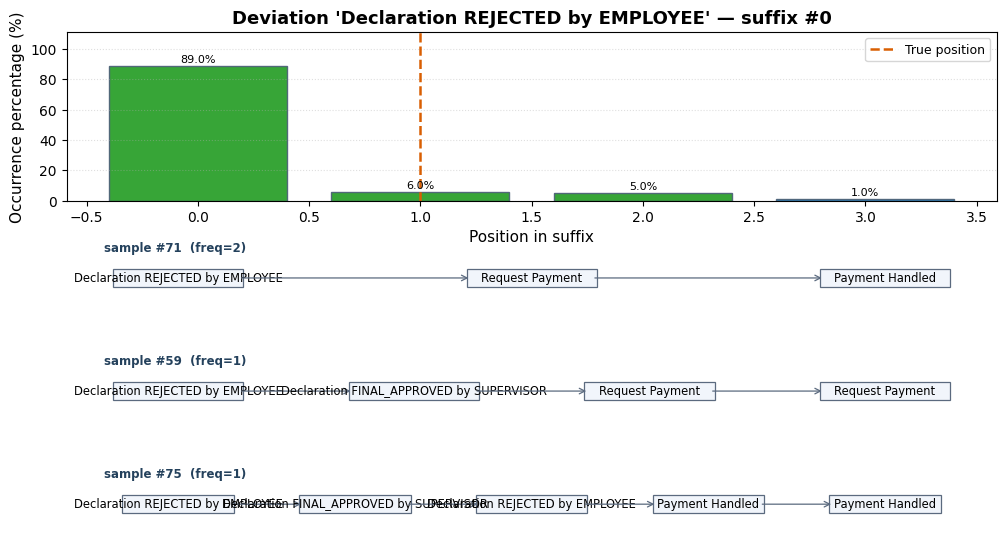

Samples placing 'Declaration REJECTED by EMPLOYEE' at position 0: [59, 71, 75, 81, 82, 96]


In [8]:
eval.plot_suffix_deviation_distribution(suffix_index=0,
                                        label='Declaration REJECTED by EMPLOYEE',
                                        tgt_suff_dev_poss=tgt_suff_dev_pos,
                                        pred_suff_dev_poss=pred_suff_dev_pos,
                                        pred_suffix_samples=real_pred_suffix_samples)